# BDAT 1004 – Data Programming

## Problem Set 3

## Question 1 - Occupations

In [5]:
import pandas as pd

In [6]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')

In [7]:
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [8]:
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [9]:
mean_age_per_occupation = users.groupby('occupation').age.mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [10]:
male_ratio = users[users.gender == 'M'].groupby('occupation').gender.count() / users.groupby('occupation').gender.count()
sorted_male_ratio = male_ratio.sort_values(ascending=False)

print(male_ratio)

occupation
administrator    0.544304
artist           0.535714
doctor           1.000000
educator         0.726316
engineer         0.970149
entertainment    0.888889
executive        0.906250
healthcare       0.312500
homemaker        0.142857
lawyer           0.833333
librarian        0.431373
marketing        0.615385
none             0.555556
other            0.657143
programmer       0.909091
retired          0.928571
salesman         0.750000
scientist        0.903226
student          0.693878
technician       0.962963
writer           0.577778
Name: gender, dtype: float64


In [11]:
print(sorted_male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [12]:
min_max_age = users.groupby('occupation').age.agg(['min', 'max'])
print(min_max_age)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [13]:
mean_age_by_gender = users.groupby(['occupation', 'gender']).age.mean()
print(mean_age_by_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [14]:
gender_counts = users.groupby(['occupation', 'gender']).gender.count().unstack()
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0)

In [15]:
print(gender_counts)

gender            F      M
occupation                
administrator  36.0   43.0
artist         13.0   15.0
doctor          NaN    7.0
educator       26.0   69.0
engineer        2.0   65.0
entertainment   2.0   16.0
executive       3.0   29.0
healthcare     11.0    5.0
homemaker       6.0    1.0
lawyer          2.0   10.0
librarian      29.0   22.0
marketing      10.0   16.0
none            4.0    5.0
other          36.0   69.0
programmer      6.0   60.0
retired         1.0   13.0
salesman        3.0    9.0
scientist       3.0   28.0
student        60.0  136.0
technician      1.0   26.0
writer         19.0   26.0


In [16]:
print(gender_percentage)

gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor              NaN  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778


## Question 2 - Euro Teams

In [17]:
eurourl = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(eurourl)

In [18]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [19]:
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [20]:
num_teams = euro12.Team.nunique()
print(num_teams)

16


In [21]:
num_columns = euro12.shape[1]
print(num_columns)

35


In [22]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [23]:
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_discipline)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [24]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(mean_yellow_cards)

7.4375


In [25]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_than_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [26]:
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [27]:
first_seven_columns = euro12.iloc[:, :7]
print(first_seven_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [28]:
all_except_last_three = euro12.iloc[:, :-3]
print(all_except_last_three)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [29]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3 - Housing

In [30]:
import numpy as np

In [31]:
s1 = pd.Series(np.random.randint(1, 5, 100))
s2 = pd.Series(np.random.randint(1, 4, 100))
s3 = pd.Series(np.random.randint(10000, 30001, 100))

In [32]:
housing_df = pd.concat([s1, s2, s3], axis=1)
print(housing_df)

    0  1      2
0   4  1  19133
1   2  1  11181
2   4  1  19980
3   1  3  14299
4   1  2  27071
.. .. ..    ...
95  2  1  29340
96  3  2  14788
97  1  3  22997
98  1  1  17400
99  4  3  15599

[100 rows x 3 columns]


In [33]:
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(housing_df)

    bedrs  bathrs  price_sqr_meter
0       4       1            19133
1       2       1            11181
2       4       1            19980
3       1       3            14299
4       1       2            27071
..    ...     ...              ...
95      2       1            29340
96      3       2            14788
97      1       3            22997
98      1       1            17400
99      4       3            15599

[100 rows x 3 columns]


In [34]:
bigcolumn = pd.concat([s1, s2, s3])
print(bigcolumn)

0         4
1         2
2         4
3         1
4         1
      ...  
95    29340
96    14788
97    22997
98    17400
99    15599
Length: 300, dtype: int64


Step 6: Ops it seems it is going only until index 99. Is it true?

Yes, it appears to be true because the indices are reset after each series in the concatenation procedure.

In [56]:
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn)

0          4
1          2
2          4
3          1
4          1
       ...  
295    29340
296    14788
297    22997
298    17400
299    15599
Length: 300, dtype: int64


## Question 4 - Wind Statistics

In [58]:
wind_data = pd.read_csv('/Users/dineshkumar/Downloads/ProblemSet3/wind.txt', delim_whitespace=True)

print(wind_data)

      Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     61   1   1  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     61   1   2  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     61   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     61   1   4  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     61   1   5  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...   ..  ..  ..    ...    ...    ...    ...    ...    ...    ...    ...   
6569  78  12  27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  78  12  28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  78  12  29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  78  12  30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  78  12  31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.6

In [59]:
wind_data['Date'] = pd.to_datetime(wind_data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
wind_data.set_index('Date', inplace=True)
wind_data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

In [60]:
wind_data.index = wind_data.index.map(lambda date: date.replace(year=date.year-100) if date.year > 1969 else date)

In [61]:
missing_values_per_location = wind_data.isnull().sum()
print(missing_values_per_location)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [62]:
total_non_missing_values = wind_data.notnull().sum().sum()
print(total_non_missing_values)

78857


In [63]:
mean_windspeed = wind_data.mean().mean()
print(mean_windspeed)

10.227982360836938


In [64]:
loc_stats = wind_data.agg(['min', 'max', 'mean', 'std'])
print(loc_stats)

            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [65]:
day_stats = wind_data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats)

             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1878-12-27  8.08  40.08  16.708333  7.868076
1878-12-28  5.00  41.46  15.150000  9.687857
1878-12-29  8.71  29.58  14.890000  5.756836
1878-12-30  9.13  28.79  15.367500  5.540437
1878-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [66]:
january_windspeeds = wind_data[wind_data.index.month == 1].mean()
print(january_windspeeds)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [68]:
yearly_windspeeds = wind_data.resample('Y').mean()
print("\nYearly Windspeeds:\n", yearly_windspeeds)


Yearly Windspeeds:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1870-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1871-12-31  11.273123   9.095178  11.088329  5.241507   9.440329  6.097151   
1872-12-31  12.463962  10.561311  12.058333  5.929699   9.430410  6.358825   
1873-12-31  11.828466  10.680493  10.680493  5.547863   9.640877  6.548740   
1874-12-31  13.643096  11.811781  12.336356  6.427041  11.110986  6.809781   
...               ...        ...        ...       ...        ...       ...   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000

In [69]:
monthly_windspeeds = wind_data.resample('M').mean()
print("\nMonthly Windspeeds:\n", monthly_windspeeds)


Monthly Windspeeds:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1870-01-31  13.152581  11.731935  13.083871  5.810968   9.507742  8.040323   
1870-02-28  14.820714  13.776071  12.643929  6.894643  11.923929  7.954643   
1870-03-31  14.941613  11.496129  13.180968  7.494194  11.484194  8.242581   
1870-04-30  14.733333  11.843667  12.711333  7.316667  10.938333  8.707333   
1870-05-31  10.185161   9.154194   9.720323  5.639677  10.465484  7.879355   
...               ...        ...        ...       ...        ...       ...   
1969-08-31  11.567419   9.656774   9.192581  5.661935   9.667097  6.407097   
1969-09-30   8.544333   7.146000  10.698000  4.161667   8.561333  4.934000   
1969-10-31  10.640968  10.424194  10.522581  5.803548  11.545161  7.075484   
1969-11-30  12.462000  11.430667  12.141333  5.499667   9.828667  6.710000   
1969-12-31  13.335806  11.969032  12.43322

In [70]:
weekly_windspeeds = wind_data.resample('W').mean()
print("\nWeekly Windspeeds:\n", weekly_windspeeds)


Weekly Windspeeds:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1870-01-02   9.295000   3.625000   9.270000  4.000000   5.960000   5.330000   
1870-01-09  13.667143  10.107143  14.188571  5.072857   7.821429   7.101429   
1870-01-16   9.292857   8.897143   8.715714  3.552857   6.947143   5.290000   
1870-01-23  18.785714  18.094286  17.387143  9.947143  14.272857  12.328571   
1870-01-30  10.637143  10.750000  12.015714  4.167143   8.600000   7.125714   
...               ...        ...        ...       ...        ...        ...   
1969-12-07  14.934286  13.237143  11.287143  6.844286  11.268571   7.547143   
1969-12-14  11.642857  10.227143   9.774286  3.804286   8.952857   6.690000   
1969-12-21  12.938571  12.470000  14.254286  6.024286   9.851429   8.898571   
1969-12-28  12.495714  10.922857   9.672857  4.374286   8.082857   6.187143   
1970-01-04  16.443333  14.34666

In [72]:
weekly_stats = wind_data.resample('W').agg(['min', 'max', 'mean', 'std'])
weekly_stats.index = weekly_stats.index + pd.offsets.Day(1)  # Shift the index by 1 day to start from January 2, 1961
print("\nWeekly Statistics (Min, Max, Mean, Std) Across All Locations:\n", weekly_stats.head(52))  # Display the first 52 weeks


Weekly Statistics (Min, Max, Mean, Std) Across All Locations:
               RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1870-01-03   9.00   9.59   9.295000  0.417193   2.96   4.29   3.625000   
1870-01-10   7.92  22.92  13.667143  5.772584   3.50  20.75  10.107143   
1870-01-17   5.00  21.67   9.292857  5.576013   3.71  18.79   8.897143   
1870-01-24  14.42  22.63  18.785714  3.273815  13.08  23.67  18.094286   
1870-01-31   4.79  17.50  10.637143  4.649447   2.17  19.08  10.750000   
1870-02-07   7.25  22.46  14.315714  6.694856   7.29  21.79  14.432857   
1870-02-14  10.79  19.87  15.988571  3.637781   6.83  26.75  15.754286   
1870-02-21   7.46  20.91  14.637143  4.930138   7.79  19.83  13.220000   
1870-02-28  10.13  23.29  16.127143  5.161801   6.38  20.83  13.571429   
1870-03-07   7.87  23.04  13.798571  4.894117   

## Question 5 - Chipotle Dataset

In [73]:
# Step 2: Import the dataset
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

In [74]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [75]:
num_observations = chipo.shape[0]
print(num_observations)

4622


In [76]:
num_columns = chipo.shape[1]
print(num_columns)

5


In [77]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [78]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [79]:
most_ordered_item = chipo.groupby('item_name').agg({'quantity':'sum'}).idxmax()
print(most_ordered_item)

quantity    Chicken Bowl
dtype: object


In [80]:
most_ordered_item_quantity = chipo.groupby('item_name').agg({'quantity':'sum'}).max()
print(most_ordered_item_quantity)

quantity    761
dtype: int64


In [81]:
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print(most_ordered_choice_description)

[Diet Coke]


In [82]:
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

4972


In [83]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print(chipo['item_price'].dtype)

float64


In [84]:
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(total_revenue)

39237.02


In [85]:
total_orders = chipo['order_id'].nunique()
print("\nTotal Number of Orders:\n", total_orders)


Total Number of Orders:
 1834


In [86]:
average_revenue_per_order = total_revenue / total_orders
print(average_revenue_per_order)

21.39423118865867


In [87]:
num_different_items = chipo['item_name'].nunique()
print(num_different_items)

50


## Question 6 
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014.

In [100]:
import matplotlib.pyplot as plt

In [101]:
us_marriages_divorces = pd.read_csv('/Users/dineshkumar/Downloads/ProblemSet3/us-marriages-divorces-1867-2014.csv')

us_marriages_divorces.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


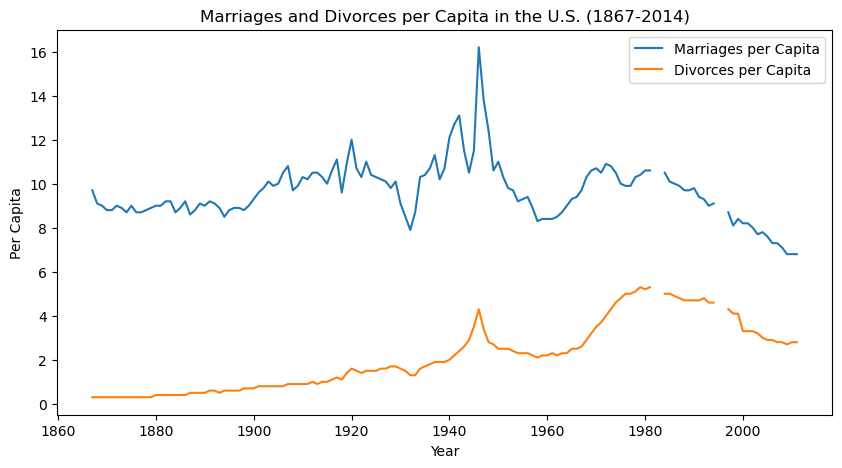

In [102]:
plt.figure(figsize=(10,5))
plt.plot(us_marriages_divorces['Year'], us_marriages_divorces['Marriages_per_1000'], label='Marriages per Capita')
plt.plot(us_marriages_divorces['Year'], us_marriages_divorces['Divorces_per_1000'], label='Divorces per Capita')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.show()

## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.

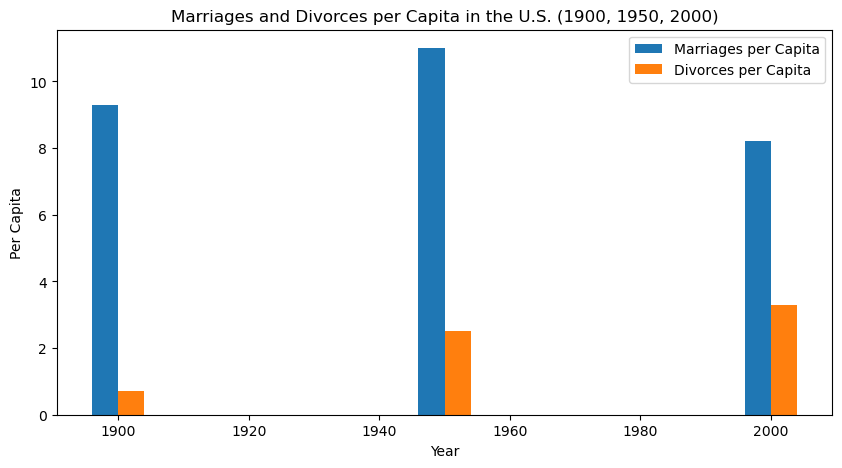

In [103]:
selected_years = us_marriages_divorces[us_marriages_divorces['Year'].isin([1900, 1950, 2000])]

plt.figure(figsize=(10,5))
plt.bar(selected_years['Year'] - 2, selected_years['Marriages_per_1000'], width=4, label='Marriages per Capita')
plt.bar(selected_years['Year'] + 2, selected_years['Divorces_per_1000'], width=4, label='Divorces per Capita')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()
plt.show()

## Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name

In [108]:
actor_kill_counts = pd.read_csv('/Users/dineshkumar/Downloads/ProblemSet3/actor_kill_counts.csv')

print(actor_kill_counts)

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239
5                 Jet Li    201
6           Nicolas Cage    204
7     Sylvester Stallone    267
8    Tomisaburo Wakayama    226
9          Wesley Snipes    193


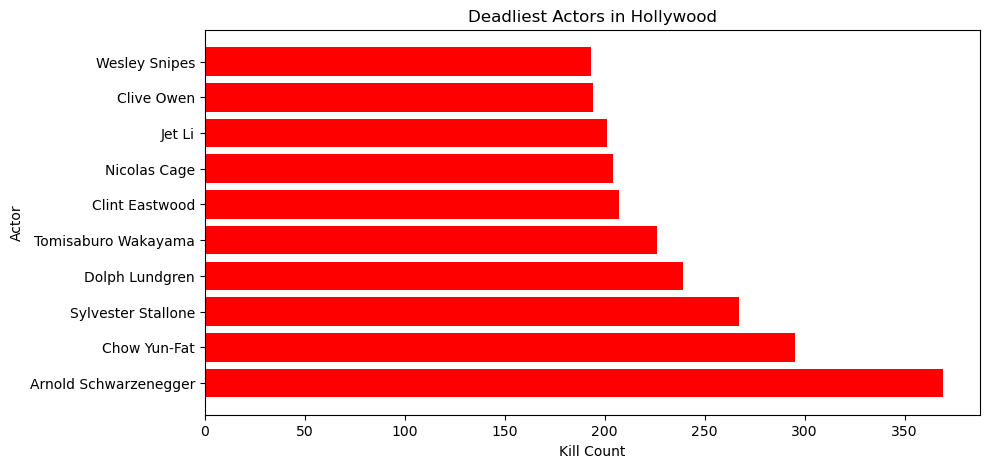

In [111]:
actor_kill_counts_sorted = actor_kill_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(actor_kill_counts_sorted['Actor'], actor_kill_counts_sorted['Count'], color='red')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()

## Question 9 

In [112]:
roman_emperors = pd.read_csv('/Users/dineshkumar/Downloads/ProblemSet3/roman-emperor-reigns.csv')
print(roman_emperors)

           Emperor  Length_of_Reign         Cause_of_Death
0         Augustus            40.58  Possibly assassinated
1         Tiberius            22.50  Possibly assassinated
2         Caligula             4.83           Assassinated
3         Claudius            13.75  Possibly assassinated
4             Nero            13.67                Suicide
..             ...              ...                    ...
63   Valentinian I            11.00         Natural causes
64          Valens            14.00       Killed in battle
65         Gratian            16.00           Assassinated
66  Valentinian II            17.00  Possibly assassinated
67    Theodosius I            16.00         Natural causes

[68 rows x 3 columns]


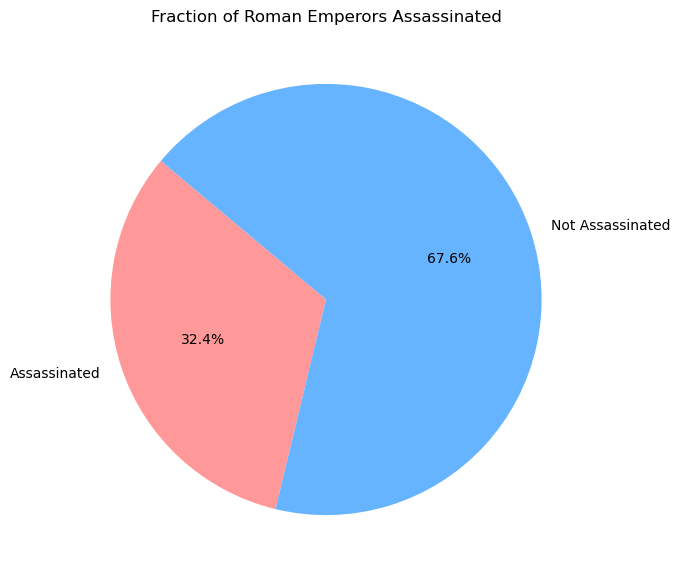

In [115]:
assassinated = roman_emperors[roman_emperors['Cause_of_Death'] == 'Assassinated'].shape[0]
not_assassinated = roman_emperors.shape[0] - assassinated
fractions = [assassinated, not_assassinated]


plt.figure(figsize=(7,7))
plt.pie(fractions, labels=['Assassinated', 'Not Assassinated'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

## Question 10 

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.

In [118]:
arcade_vs_cs = pd.read_csv('/Users/dineshkumar/Downloads/ProblemSet3/arcade-revenue-vs-cs-doctorates.csv')
print(arcade_vs_cs)

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   
5  2005                            1.435   
6  2006                            1.601   
7  2007                            1.654   
8  2008                            1.803   
9  2009                            1.734   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  
5                                      1129  
6                                      1453  
7                                      1656  
8                                      1787  
9                                      1611  


In [119]:
arcade_vs_cs.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


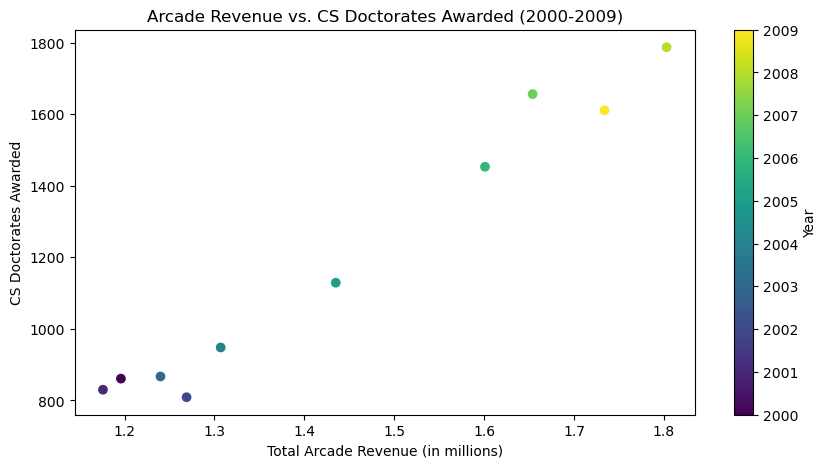

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(arcade_vs_cs['Total Arcade Revenue (billions)'], arcade_vs_cs['Computer Science Doctorates Awarded (US)'], c=arcade_vs_cs['Year'], cmap='viridis')


plt.xlabel('Total Arcade Revenue (in millions)')
plt.ylabel('CS Doctorates Awarded')
plt.title('Arcade Revenue vs. CS Doctorates Awarded (2000-2009)')
plt.colorbar(label='Year')
plt.show()